# Capstone Project: Predictive Analysis
#
### 1. Importing Libraries and Dataset
#### First, import the necessary libraries: NumPy, Pandas, and Matplotlib for data manipulation and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Simulated dataset: Sales data for 12 months
data = {
    'Month': pd.date_range(start='2022-01-01', periods=12, freq='M'),
    'Sales': [250, 270, 300, 320, 340, 380, 400, 420, 460, 480, 500, 520]
}
df = pd.DataFrame(data)

# Display the dataset
print(df)


        Month  Sales
0  2022-01-31    250
1  2022-02-28    270
2  2022-03-31    300
3  2022-04-30    320
4  2022-05-31    340
5  2022-06-30    380
6  2022-07-31    400
7  2022-08-31    420
8  2022-09-30    460
9  2022-10-31    480
10 2022-11-30    500
11 2022-12-31    520


# 
### 2. Exploratory Data Analysis (EDA)
#### 2.1 Summary Statistics
##### You can check basic summary statistics of the dataset:

In [3]:
print(df.describe())

                     Month       Sales
count                   12   12.000000
mean   2022-07-15 22:00:00  386.666667
min    2022-01-31 00:00:00  250.000000
25%    2022-04-22 12:00:00  315.000000
50%    2022-07-15 12:00:00  390.000000
75%    2022-10-07 18:00:00  465.000000
max    2022-12-31 00:00:00  520.000000
std                    NaN   91.684571


### 2.2 Data Visualization
#### Visualize the sales over time with a line plot:

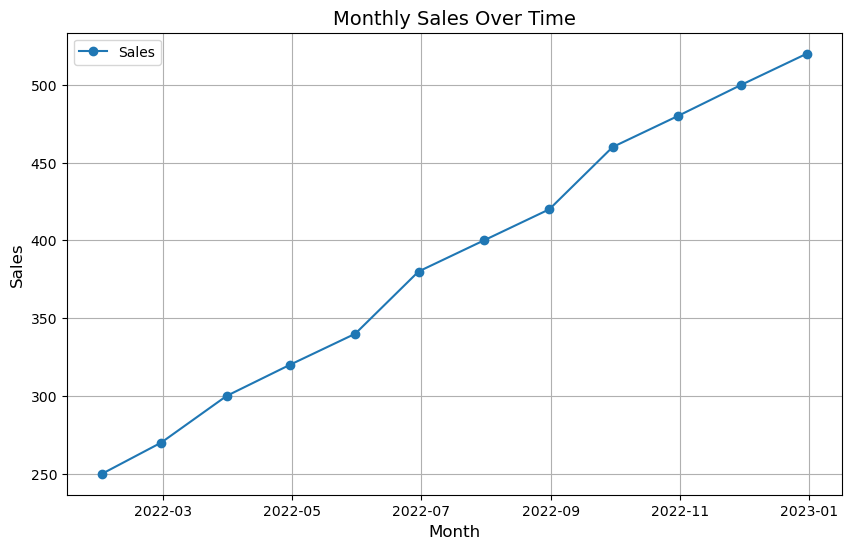

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sales'], marker='o', label='Sales')
plt.title('Monthly Sales Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

#
# 3. Predictive Analysis
### 3.1 Creating a Simple Linear Trend Model
#### To predict future sales based on past data, you can use linear regression. First, create a numerical column (Month_Number) to represent the months in sequence.

In [5]:
df['Month_Number'] = np.arange(1, len(df) + 1)


In [6]:
# Simple linear regression using NumPy
X = df['Month_Number']
y = df['Sales']

In [7]:
# Calculate slope (m) and intercept (b) of y = mx + b
m, b = np.polyfit(X, y, 1)

In [8]:
# Predict sales
df['Predicted_Sales'] = m * X + b

In [9]:
# Display predictions
print(df[['Month', 'Sales', 'Predicted_Sales']])

        Month  Sales  Predicted_Sales
0  2022-01-31    250       247.051282
1  2022-02-28    270       272.435897
2  2022-03-31    300       297.820513
3  2022-04-30    320       323.205128
4  2022-05-31    340       348.589744
5  2022-06-30    380       373.974359
6  2022-07-31    400       399.358974
7  2022-08-31    420       424.743590
8  2022-09-30    460       450.128205
9  2022-10-31    480       475.512821
10 2022-11-30    500       500.897436
11 2022-12-31    520       526.282051


##
### 3.2 Visualizing Actual vs Predicted Sales
#### To compare the actual sales with the predicted sales, plot them together:

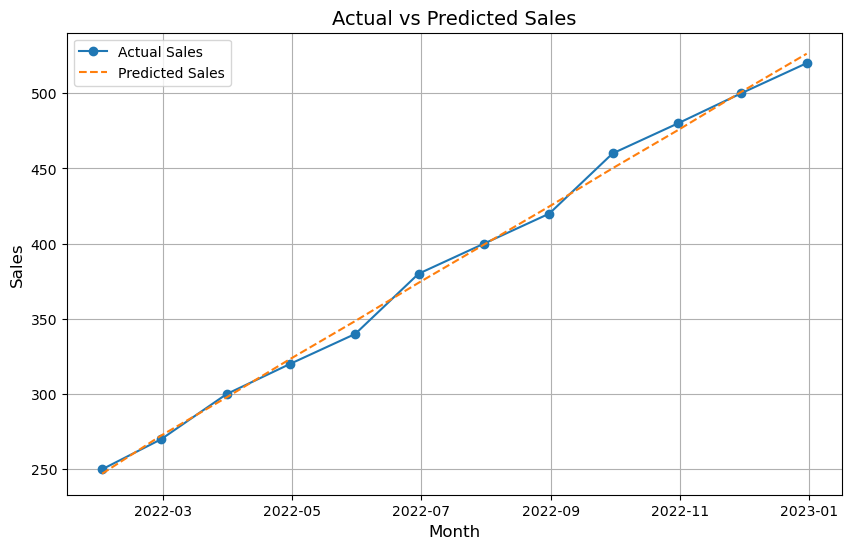

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sales'], marker='o', label='Actual Sales')
plt.plot(df['Month'], df['Predicted_Sales'], linestyle='--', label='Predicted Sales')
plt.title('Actual vs Predicted Sales', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

#
# 4. Future Prediction
### 4.1 Predicting Sales for Future Months
#### Extend the dataset to predict future sales. For example, predict sales for the next 6 months:

In [11]:
# Extending the dataset for future months
future_months = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', periods=6, freq='M'),
    'Month_Number': np.arange(len(df) + 1, len(df) + 7)
})

In [12]:
# Predicting future sales
future_months['Predicted_Sales'] = m * future_months['Month_Number'] + b

In [13]:
# Display future predictions
print(future_months)

       Month  Month_Number  Predicted_Sales
0 2023-01-31            13       551.666667
1 2023-02-28            14       577.051282
2 2023-03-31            15       602.435897
3 2023-04-30            16       627.820513
4 2023-05-31            17       653.205128
5 2023-06-30            18       678.589744


###
### 4.2 Visualizing Future Predictions
#### Plot both historical and future predictions together:

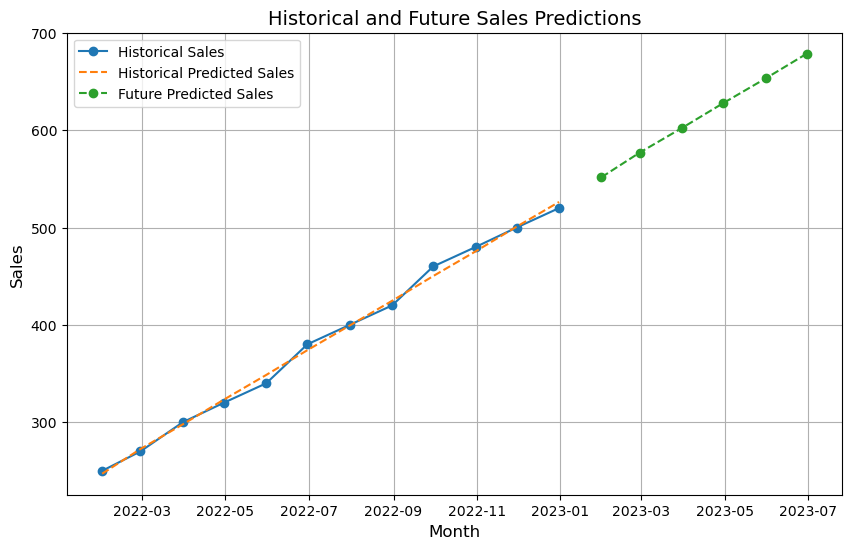

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sales'], marker='o', label='Historical Sales')
plt.plot(df['Month'], df['Predicted_Sales'], linestyle='--', label='Historical Predicted Sales')
plt.plot(future_months['Month'], future_months['Predicted_Sales'], marker='o', linestyle='--', label='Future Predicted Sales')
plt.title('Historical and Future Sales Predictions', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()